# Monthly Average House Price (Jan 1991 - Dec 2016)', 'Year', 'Average House Price (£)'

In [14]:
!pip install wbdata pandas seaborn matplotlib tabulate
#Libraries used to for all questions
import pandas as pd
import numpy as np
from scipy import stats
from tabulate import tabulate
import wbdata as wb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import math

import warnings 

warnings.filterwarnings('ignore')

In [15]:
!pip install xlrd

# UK FTSE100 & Monthly House Prices Index (1991-2016)

In [16]:
# Load FTSE data
ftse_file = "FTSE100.csv"
ftse_df = pd.read_csv(ftse_file)
ftse_df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,12/1/2016,6783.79,6789.30,6688.41,6752.93,966722048,6752.93
1,11/1/2016,6954.22,6993.79,6903.61,6917.14,780871680,6917.14
2,10/3/2016,6899.33,6996.43,6898.09,6983.52,745408640,6983.52
3,9/1/2016,6781.51,6826.22,6723.21,6745.97,991756480,6745.97
4,8/1/2016,6724.43,6769.41,6678.45,6693.95,727709696,6693.95


In [17]:
ftse_df["Date"] = pd.to_datetime(ftse_df["Date"])
ftse_df.set_index("Date", inplace=True)
ftse_df.sort_index(inplace=True)
ftse_prices = ftse_df[["Adj Close"]]
ftse_prices.head()


,Adj Close
Date,
1991-01-01,2170.300049
1991-02-01,2380.899902
1991-03-01,2456.500000
1991-04-01,2486.199951
1991-05-01,2499.500000


In [18]:

# Load housing data
housing_file = "Monthly Average House Price.xls"
housing_df = pd.read_excel(housing_file, index_col=0)
housing_df.head()


,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [19]:
housing_prices = housing_df[["Average House Price"]]
housing_prices = housing_prices.iloc[:312, :]
housing_prices.dropna(inplace=True)
housing_prices.head()


,Average House Price
1991-01-01,53051.721106
1991-02-01,53496.798746
1991-03-01,52892.861606
1991-04-01,53677.435270
1991-05-01,54385.726747


In [20]:
# Calculate monthly returns
ftse_prices["MonthlyReturns"] = ftse_prices["Adj Close"] / ftse_prices["Adj Close"].shift(1) - 1
print(ftse_prices.head())
print('')
housing_prices["MonthlyReturns"] = housing_prices["Average House Price"] / housing_prices["Average House Price"].shift(1) - 1
print(housing_prices)
print('')
# Calculate cumulative sum
ftse_prices["CumulativeFTSE"] = ftse_prices["MonthlyReturns"].cumsum()
ftse_prices.head()

print('')
housing_prices["CumulativeHousing"] = housing_prices["MonthlyReturns"].cumsum()
housing_prices.head()

              Adj Close  MonthlyReturns
Date                                   
1991-01-01  2170.300049             NaN
1991-02-01  2380.899902        0.097037
1991-03-01  2456.500000        0.031753
1991-04-01  2486.199951        0.012090
1991-05-01  2499.500000        0.005350

            Average House Price  MonthlyReturns
1991-01-01         53051.721106             NaN
1991-02-01         53496.798746        0.008390
1991-03-01         52892.861606       -0.011289
1991-04-01         53677.435270        0.014833
1991-05-01         54385.726747        0.013195
...                         ...             ...
2016-08-01        206144.961815        0.002089
2016-09-01        206014.691677       -0.000632
2016-10-01        205904.191651       -0.000536
2016-11-01        204947.430028       -0.004647
2016-12-01        205897.846011        0.004637

[312 rows x 2 columns]




,Average House Price,MonthlyReturns,CumulativeHousing
1991-01-01,53051.721106,NaN,NaN
1991-02-01,53496.798746,0.008390,0.008390
1991-03-01,52892.861606,-0.011289,-0.002900
1991-04-01,53677.435270,0.014833,0.011934
1991-05-01,54385.726747,0.013195,0.025129


In [21]:
# Normalize data using lambda function
normalize = lambda x, factor: round(x * (100 / factor))

housing_prices["NormalizedHousing"] = normalize(housing_prices["CumulativeHousing"], 0.008390)
housing_prices.head()

,Average House Price,MonthlyReturns,CumulativeHousing,NormalizedHousing
1991-01-01,53051.721106,NaN,NaN,NaN
1991-02-01,53496.798746,0.008390,0.008390,100.0
1991-03-01,52892.861606,-0.011289,-0.002900,-35.0
1991-04-01,53677.435270,0.014833,0.011934,142.0
1991-05-01,54385.726747,0.013195,0.025129,300.0


In [22]:
ftse_prices["NormalizedFTSE"] = normalize(ftse_prices["CumulativeFTSE"], 0.097037)
ftse_prices.head()

,Adj Close,MonthlyReturns,CumulativeFTSE,NormalizedFTSE
Date,,,,
1991-01-01,2170.300049,NaN,NaN,NaN
1991-02-01,2380.899902,0.097037,0.097037,100.0
1991-03-01,2456.500000,0.031753,0.128790,133.0
1991-04-01,2486.199951,0.012090,0.140880,145.0
1991-05-01,2499.500000,0.005350,0.146230,151.0


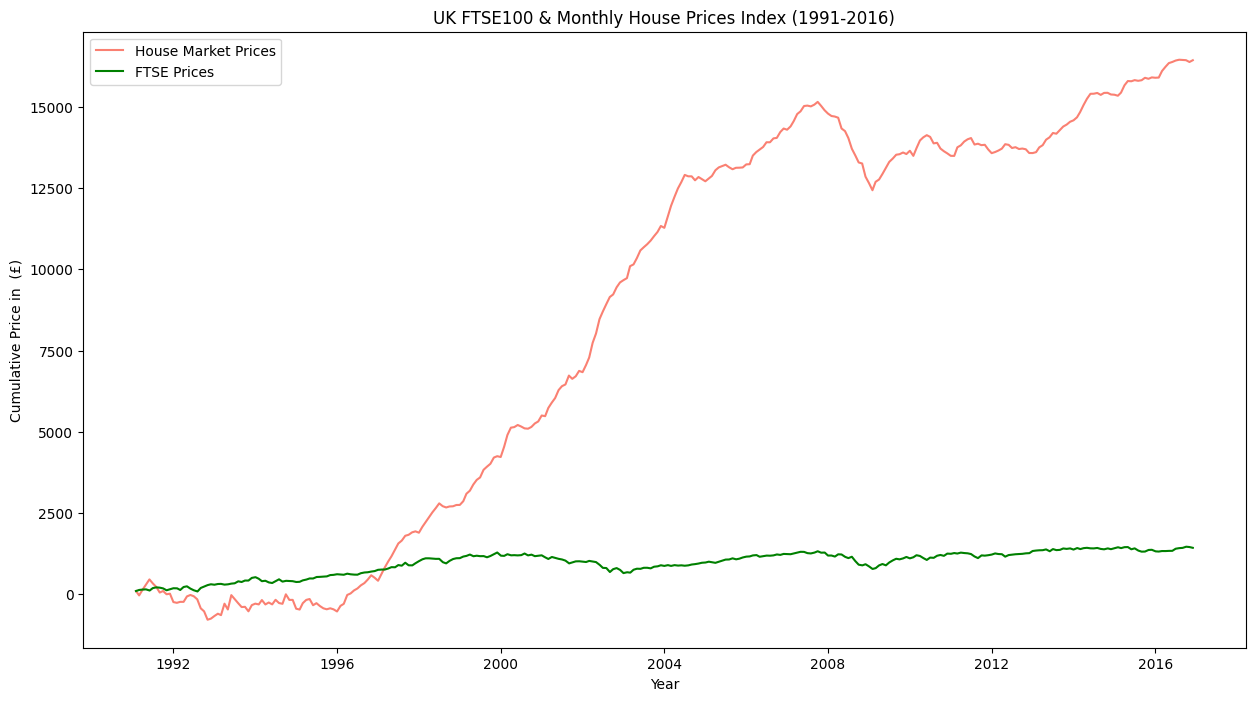


Annualized Returns:
Stock Market Index      Annualized Return (%)
--------------------  -----------------------
FTSE100 Index                         4.46252


In [23]:
# Plot data
plt.plot(housing_prices.index, housing_prices["NormalizedHousing"], label="House Market Prices", color="salmon")
plt.plot(ftse_prices.index, ftse_prices["NormalizedFTSE"], label="FTSE Prices", color="Green")
plt.gca().set(title="UK FTSE100 & Monthly House Prices Index (1991-2016)",
              xlabel="Year", ylabel="Cumulative Price in  (£)")
plt.rcParams["figure.figsize"] = (15, 8)
plt.legend()
plt.show()

# Calculate annualized returns
months_ftse = len(ftse_prices)
months_housing = len(housing_prices)

annual_return_ftse = ftse_prices["MonthlyReturns"].add(1).prod() ** (12 / months_ftse) - 1
# annual_return_housing = housing_prices["MonthlyReturns"].add(1).prod() ** (12 / months_housing) - 1

# Create a dictionary for annualized returns
annualized_returns = {
    "Stock Market Index": ["FTSE100 Index"],
    "Annualized Return (%)": [annual_return_ftse * 100]
}

# Print the annualized returns in a table using tabulate
table = tabulate(annualized_returns, headers="keys", tablefmt="rounded_grid")
print("\nAnnualized Returns:")
print(table)
